In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [22]:
pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Read the CSV file
hsg = pd.read_csv(r'C:\Documents\PTTK\Project\HSG Historical Data.csv')

hsg = hsg.sort_index(ascending=False)
hsg = hsg.reset_index(drop=True)
hsg['Date'] = pd.to_datetime(hsg['Date'])
hsg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
hsg['Change %'] = hsg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
hsg['Change %'] = hsg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    hsg[col] = hsg[col].str.replace(',', '').astype(float)

missing_values = hsg.isnull().sum()
hsg = hsg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
hsg['Vol.'] = hsg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
df = hsg[['Price']]
df

,Price
Date,
2020-01-02,5909.1
2020-01-03,5757.6
2020-01-06,5786.4
2020-01-07,5721.5
2020-01-08,5678.2
...,...
2024-10-28,20750.0
2024-10-29,20700.0
2024-10-30,20350.0


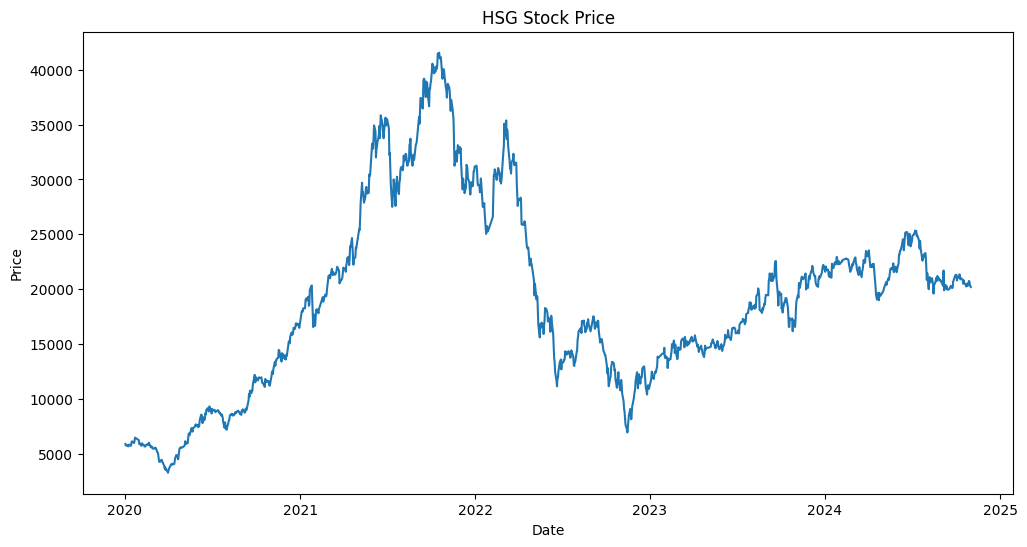

In [24]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title('HSG Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [25]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [26]:
# 4. Chia train test
train_size = round(0.7 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [27]:
# 5. Hàm Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(64,return_sequences=True))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hien0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.1311
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0177
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0076
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0051
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - loss: 0.0045
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - loss: 0.0040
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 0.0039
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0030
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0030
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0025
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.0030
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0026
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0030
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s

In [32]:
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


In [33]:
# 11. Chuẩn hóa dữ liệu ytest, y_pred
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [37]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)
# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)


Testing RMSE: 658.9789157478284
Testing MAPE: 2.2865063569874895
Testing MAE: 478.1376504130747
Testing R^2: 0.85814733543832


In [35]:
# 13. Dự báo 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))


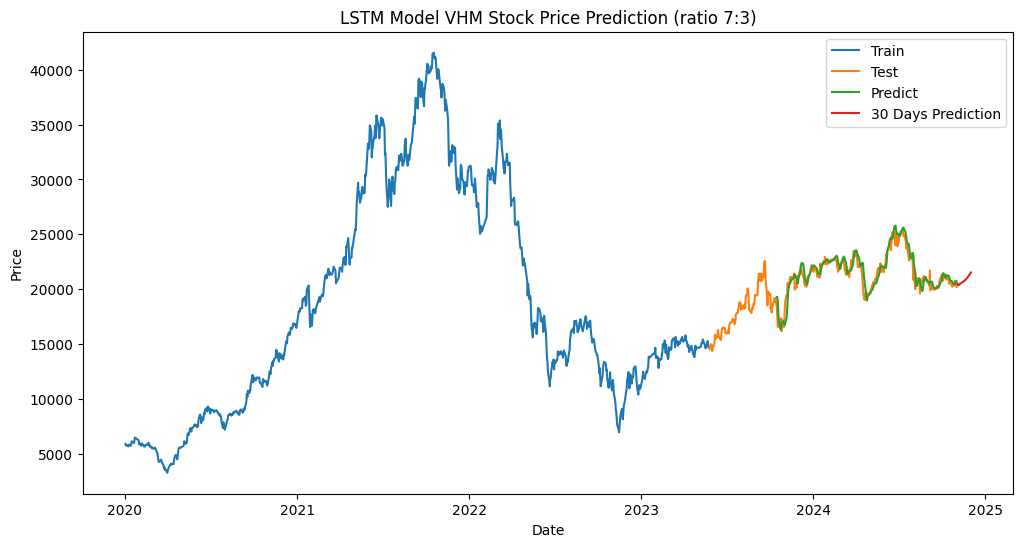

In [36]:
# Assuming `hsg`, `train_size`, `train_data`, `test_data`, `y_pred`, `pred_30_days`, `pred_60_days`, and `pred_90_days` are defined

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot the train and test data
dates = hsg.index
plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')

# Plot the predicted test data
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

# Get the last date from the dates index
last_date = dates[-1]

# Forecast for the next 30, 60, and 90 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')

# Add title and labels
plt.title('LSTM Model VHM Stock Price Prediction (ratio 7:3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()